# Example from La Palma
- This notebook shows how to convert the Raman-based FI densities from Dayton et al. (2023) into pressures and depths in the crust
- This assumes +-50K error in entrapment temperature, and an error in CO$_2$ density of 0.002925 g/cm3
- Depth is calculated using a 2-step density profile, with 2.8 g/cm3 above the Moho, and 3.1 g/cm3 below
- You can download the excel spreadsheet here. 
- https://github.com/PennyWieser/DiadFit/blob/main/docs/Examples/EOS_calculations/Dayton_et_al_2023_LaPalma_Example.xlsx

### Install DiadFit if you havent already! You might also have to install CoolProp if you want to use Span and Wagner EOS - the error message will give you instructions, else reach out

In [1]:
#!pip install --upgrade DiadFit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.90'

## Lets load in the data

In [3]:
# Get from here: https://github.com/PennyWieser/DiadFit/blob/main/docs/Examples/EOS_calculations/Dayton_et_al_2023_LaPalma_Example.xlsx
data=pd.read_excel('Dayton_et_al_2023_LaPalma_Example.xlsx',
                   sheet_name='Sheet1')
data.head()

,SAMPLE,FileName,Density (g/cm^3),Comment (EPMA Data Point),Na2O,MgO,SiO2,Al2O3,P2O5,K2O,CaO,TiO2,FeO,MnO,Cr2O3,NiO,Total,Fo
0,0,03 LM0 G1 FI1,0.875343,LM0_G1_RIM,0.009036,42.12351,39.90642,0.018331,0.000023,0.005965,0.213926,0.034901,17.91823,0.292019,0.078602,0.190220,100.7912,0.807341
1,0,06 LM0 G2 FI1,0.780430,LM0_G2_CENTER,0.009698,44.42279,39.70696,0.008494,0.000023,0.000412,0.322745,0.022287,15.26419,0.225410,0.018465,0.194827,100.1963,0.838388
2,0,17 LM0 G3 FI3,0.936785,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989
3,0,11 LM0 G3 FI1 (CRR),0.928828,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989
4,0,19 LM0 G3 FI4,0.928514,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989


Processing:   0%|          | 0/115 [00:00<?, ?it/s]

Processing: 100%|██████████| 115/115 [00:08<00:00, 13.49it/s]


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,03 LM0 G1 FI1,0.875343,22.716755,6.016987,6.053070,5.990242,0.837292,0.791006,22.867064,22.684986,3.214929,3.076671,50.043767,0.053767,100.043767,1423.15,0.875343,None,2700,SW96
1,06 LM0 G2 FI1,0.780430,17.772882,4.707503,4.753428,4.707867,0.623057,0.614221,17.938456,17.825534,2.377787,2.266136,50.039021,0.049021,100.039021,1423.15,0.780430,None,2700,SW96
2,17 LM0 G3 FI3,0.936785,26.473339,7.011993,7.028768,6.983530,1.021785,1.041846,26.551999,26.410964,3.917163,3.918316,50.046839,0.056839,100.046839,1423.15,0.936785,None,2700,SW96
3,11 LM0 G3 FI1 (CRR),0.928828,25.960455,6.876146,6.971079,6.895832,1.036334,1.018437,26.329726,26.113753,3.942801,3.970377,50.046441,0.056441,100.046441,1423.15,0.928828,None,2700,SW96
4,19 LM0 G3 FI4,0.928514,25.940437,6.870844,6.931863,6.851173,0.967948,0.932449,26.172443,25.764068,3.684068,3.558455,50.046426,0.056426,100.046426,1423.15,0.928514,None,2700,SW96


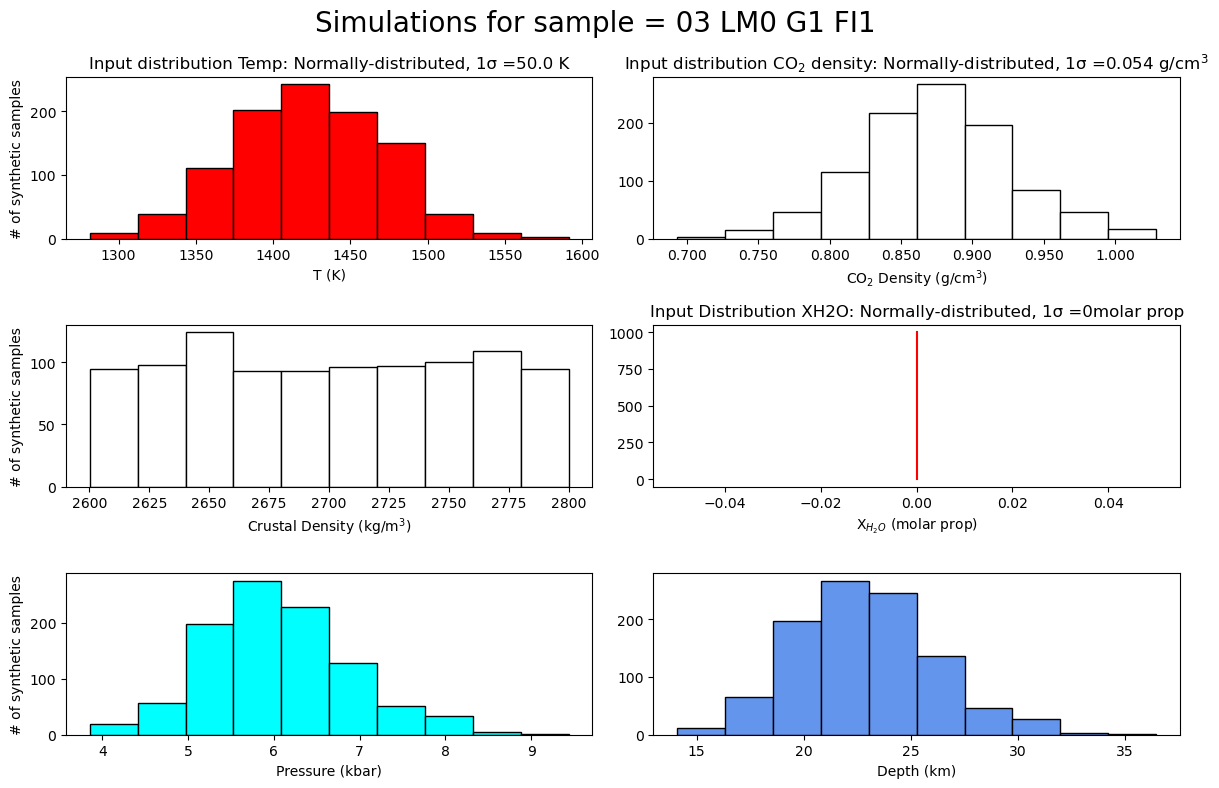

In [9]:
MC_Av, MC_All, fig=pf.propagate_FI_uncertainty(
T_K=1150+273.15,
error_T_K=50+data['Density (g/cm^3)']*0.05, 
error_type_T_K='Abs', 
error_dist_T_K='normal',
CO2_dens_gcm3=data['Density (g/cm^3)'],
error_CO2_dens=data['Density (g/cm^3)']*0.05+0.01, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
crust_dens_kgm3=2700, error_crust_dens=data['Density (g/cm^3)']*0.05+100, error_type_crust_dens='Abs', error_dist_crust_dens='uniform',
sample_ID=data['FileName'],
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av.head()

- We can fisualize the range of meausured densities

Text(0, 0.5, '# of meas')

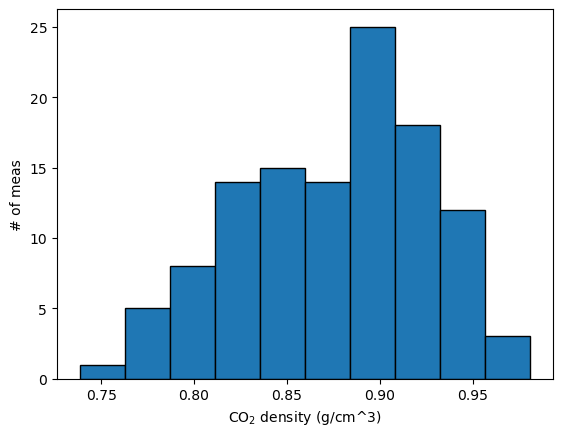

In [4]:
plt.hist(data['Density (g/cm^3)'], ec='k')
plt.xlabel('CO$_2$ density (g/cm^3)')
plt.ylabel('# of meas')

## Now lets propagate uncertainty in each fluid inclusion
- Here we use a temperature of 1150 K, with a +-50 K (i.e. an absolute uncertainty) distributed normally
- We say the error in CO2 density (from repeated Raman measurements) is 0.002925 g/cm3 (i.e. an absolute uncertainty) distributed normally 
- We want to use 2 step crustal density model, with 2800 kg/m3 above 14km depth, and 3100kg/m3 below
- The figure shows us the simulation file the 1st file (file_i=0). For the Nth file, enter file_i=N-1 as python counting starts at 0

Processing:   0%|          | 0/115 [00:00<?, ?it/s]

Processing: 100%|██████████| 115/115 [00:03<00:00, 31.06it/s]


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,03 LM0 G1 FI1,0.875343,21.140399,6.016987,6.028375,6.026407,0.226400,0.222767,21.177846,21.171376,0.744466,0.732523,50,0.002925,0.0,1423.15,0.875343,two-step,None,SW96
1,06 LM0 G2 FI1,0.780430,16.834446,4.707503,4.711962,4.708728,0.178208,0.181956,16.849106,16.838473,0.585997,0.598324,50,0.002925,0.0,1423.15,0.780430,two-step,None,SW96
2,17 LM0 G3 FI3,0.936785,24.412263,7.011993,7.007053,7.008770,0.251314,0.241864,24.396017,24.401664,0.826391,0.795319,50,0.002925,0.0,1423.15,0.936785,two-step,None,SW96
3,11 LM0 G3 FI1 (CRR),0.928828,23.965558,6.876146,6.872890,6.865458,0.243974,0.243343,23.954853,23.930414,0.802255,0.800182,50,0.002925,0.0,1423.15,0.928828,two-step,None,SW96
4,19 LM0 G3 FI4,0.928514,23.948123,6.870844,6.887315,6.881699,0.254788,0.256404,24.002284,23.983818,0.837814,0.843129,50,0.002925,0.0,1423.15,0.928514,two-step,None,SW96


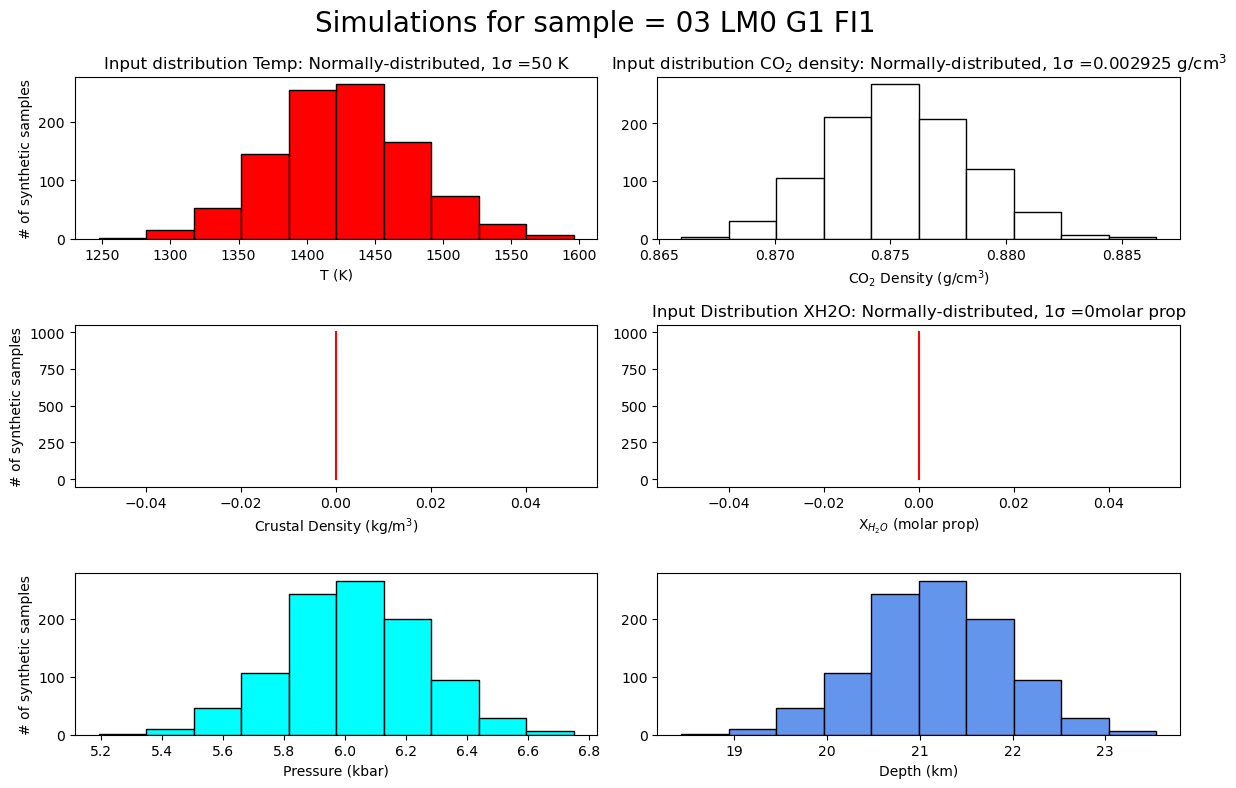

In [5]:
MC_Av, MC_All, fig=pf.propagate_FI_uncertainty(
T_K=1150+273.15,
error_T_K=50, 
error_type_T_K='Abs', 
error_dist_T_K='normal',
CO2_dens_gcm3=data['Density (g/cm^3)'],
error_CO2_dens=0.002925, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
sample_ID=data['FileName'],
model='two-step', d1=14, rho1=2800, rho2=3100,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av.head()

In [6]:
# This returns 2 dataframes, one showing the mean and standard deviation of the simulation for each fluid inclusion
MC_Av.head()

,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,03 LM0 G1 FI1,0.875343,21.140399,6.016987,6.028375,6.026407,0.226400,0.222767,21.177846,21.171376,0.744466,0.732523,50,0.002925,0.0,1423.15,0.875343,two-step,None,SW96
1,06 LM0 G2 FI1,0.780430,16.834446,4.707503,4.711962,4.708728,0.178208,0.181956,16.849106,16.838473,0.585997,0.598324,50,0.002925,0.0,1423.15,0.780430,two-step,None,SW96
2,17 LM0 G3 FI3,0.936785,24.412263,7.011993,7.007053,7.008770,0.251314,0.241864,24.396017,24.401664,0.826391,0.795319,50,0.002925,0.0,1423.15,0.936785,two-step,None,SW96
3,11 LM0 G3 FI1 (CRR),0.928828,23.965558,6.876146,6.872890,6.865458,0.243974,0.243343,23.954853,23.930414,0.802255,0.800182,50,0.002925,0.0,1423.15,0.928828,two-step,None,SW96
4,19 LM0 G3 FI4,0.928514,23.948123,6.870844,6.887315,6.881699,0.254788,0.256404,24.002284,23.983818,0.837814,0.843129,50,0.002925,0.0,1423.15,0.928514,two-step,None,SW96


In [7]:
# The second output shows every single simulation for each FI. So the first N rows are for the first FI, then next N rows for the next, etc. 
MC_All.head()

,Filename,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,model,MC_T_K,MC_CO2_dens_gcm3
0,03 LM0 G1 FI1,6.117700,611.769978,21.471572,None,two-step,1427.338337,0.880721
1,03 LM0 G1 FI1,6.392117,639.211667,22.373933,None,two-step,1514.019782,0.874210
2,03 LM0 G1 FI1,5.842253,584.225337,20.565826,None,two-step,1371.777520,0.878760
3,03 LM0 G1 FI1,6.109869,610.986859,21.445821,None,two-step,1449.373664,0.873962
4,03 LM0 G1 FI1,5.962628,596.262781,20.961651,None,two-step,1401.184548,0.878112


### Lets segment for the eruption sample
- These are 'Logicals' e.g. a list of True and False statements, these allow us to splice up the dataframe for each sample

In [8]:
sam0=data['SAMPLE']==0
sam1=data['SAMPLE']==2
sam4=data['SAMPLE']==4
sam6=data['SAMPLE']==6

In [9]:
## For example, lets get the data for sample 6
data.loc[sam4].head()

,SAMPLE,FileName,Density (g/cm^3),Comment (EPMA Data Point),Na2O,MgO,SiO2,Al2O3,P2O5,K2O,CaO,TiO2,FeO,MnO,Cr2O3,NiO,Total,Fo
64,4,33 LM4 G10 FI1,0.883142,LM4_G10_CENTER,0.005704,43.27957,39.78854,0.046593,0.000023,0.000012,0.260105,0.032116,17.21845,0.260287,0.000015,0.173901,101.0653,0.817535
65,4,35 LM4 G10 FI2,0.880190,LM4_G10_CENTER,0.005704,43.27957,39.78854,0.046593,0.000023,0.000012,0.260105,0.032116,17.21845,0.260287,0.000015,0.173901,101.0653,0.817535
66,4,37 LM4 G11 FI1,0.802879,LM4_G11_CENTER,0.009361,42.20617,39.88140,0.022088,0.000023,0.000012,0.262543,0.007344,17.89086,0.249368,0.000015,0.169237,100.6984,0.807883
67,4,41 LM4 G11 FI3,0.796047,LM4_G11_CENTER,0.009361,42.20617,39.88140,0.022088,0.000023,0.000012,0.262543,0.007344,17.89086,0.249368,0.000015,0.169237,100.6984,0.807883
68,4,39 LM4 G11 FI2,0.790258,LM4_G11_CENTER,0.009361,42.20617,39.88140,0.022088,0.000023,0.000012,0.262543,0.007344,17.89086,0.249368,0.000015,0.169237,100.6984,0.807883


## Lets plot each FI depth and its error bar, colored by sample (as in Dayton et al. 2023)

Text(0, 0.5, 'Pressure (kbar)')

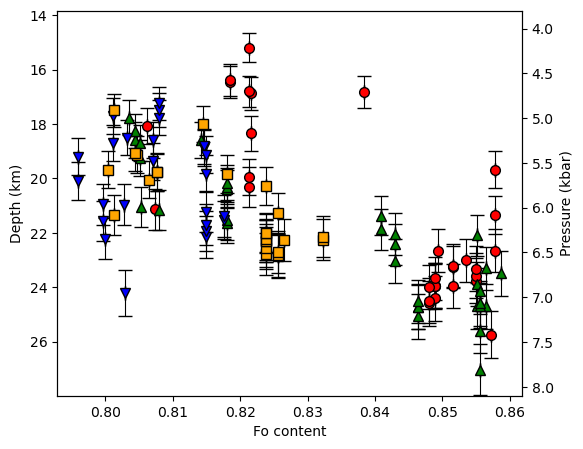

In [10]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))


ms=7
# This plots a symbol with its error bar for sample 0
ax1.errorbar(data['Fo'].loc[sam0], 
             MC_Av['SingleFI_D_km'].loc[sam0],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam0],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=ms, mec='k', capsize=5)

# This plots a symbol with its error bar for sample 1
ax1.errorbar(data['Fo'].loc[sam1], 
             MC_Av['SingleFI_D_km'].loc[sam1],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam1],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='green', ms=ms, mec='k', capsize=5)

# This plots a symbol with its error bar for sample 4
ax1.errorbar(data['Fo'].loc[sam4], 
             MC_Av['SingleFI_D_km'].loc[sam4],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam4],
             fmt='v', ecolor='k', elinewidth=0.8, mfc='blue', ms=ms, mec='k', capsize=5)

# This plots a symbol with its error bar for sample 6
ax1.errorbar(data['Fo'].loc[sam6], 
             MC_Av['SingleFI_D_km'].loc[sam6],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam6],
             fmt='s', ecolor='k', elinewidth=0.8, mfc='orange', ms=ms, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax1.set_ylabel('Depth (km)')
ax1.invert_yaxis()
ax2=ax1.twinx()
ax2.invert_yaxis()
# This sets the range of pressures you want
Plim1=3.8
Plim2=8.1
ax2.set_ylim([Plim2, Plim1])
# This calculates the corresponding depths for those pressures. 
D_Plim1=pf.convert_pressure_depth_2step(P_kbar=Plim1, d1=14, rho1=2800, rho2=3100, g=9.81)
D_Plim2=pf.convert_pressure_depth_2step(P_kbar=Plim2, d1=14, rho1=2800, rho2=3100, g=9.81)
ax1.set_ylim([D_Plim2, D_Plim1])
ax2.set_ylabel('Pressure (kbar)')

## Complex double axis aligning
- The plot above was relatively easy, because we were always working below the density transition from layer 1 to layer 2
- Be careful - if your density transition lies in the range, showing the axes is very complicated! 
- One option is presented here. 
https://stackoverflow.com/questions/59349185/non-linear-second-axis-in-matplotlib

Processing: 100%|██████████| 115/115 [00:02<00:00, 45.74it/s]


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,03 LM0 G1 FI1,0.875343,22.716755,6.016987,6.063499,6.009897,0.852436,0.850150,21.293261,21.117087,2.803295,2.795536,50,0.053767,0.0,1423.15,0.875343,two-step,2700,SW96
1,06 LM0 G2 FI1,0.780430,17.772882,4.707503,4.732609,4.660145,0.663552,0.656338,16.910755,16.678718,2.194696,2.158226,50,0.049021,0.0,1423.15,0.780430,two-step,2700,SW96
2,17 LM0 G3 FI3,0.936785,26.473339,7.011993,7.042276,7.022693,0.985650,0.958526,24.511840,24.447448,3.241097,3.151906,50,0.056839,0.0,1423.15,0.936785,two-step,2700,SW96
3,11 LM0 G3 FI1 (CRR),0.928828,25.960455,6.876146,6.880726,6.819641,0.932950,0.965334,23.980620,23.779753,3.067805,3.174293,50,0.056441,0.0,1423.15,0.928828,two-step,2700,SW96
4,19 LM0 G3 FI4,0.928514,25.940437,6.870844,6.918807,6.882063,0.970320,0.963611,24.105841,23.985014,3.190686,3.168628,50,0.056426,0.0,1423.15,0.928514,two-step,2700,SW96


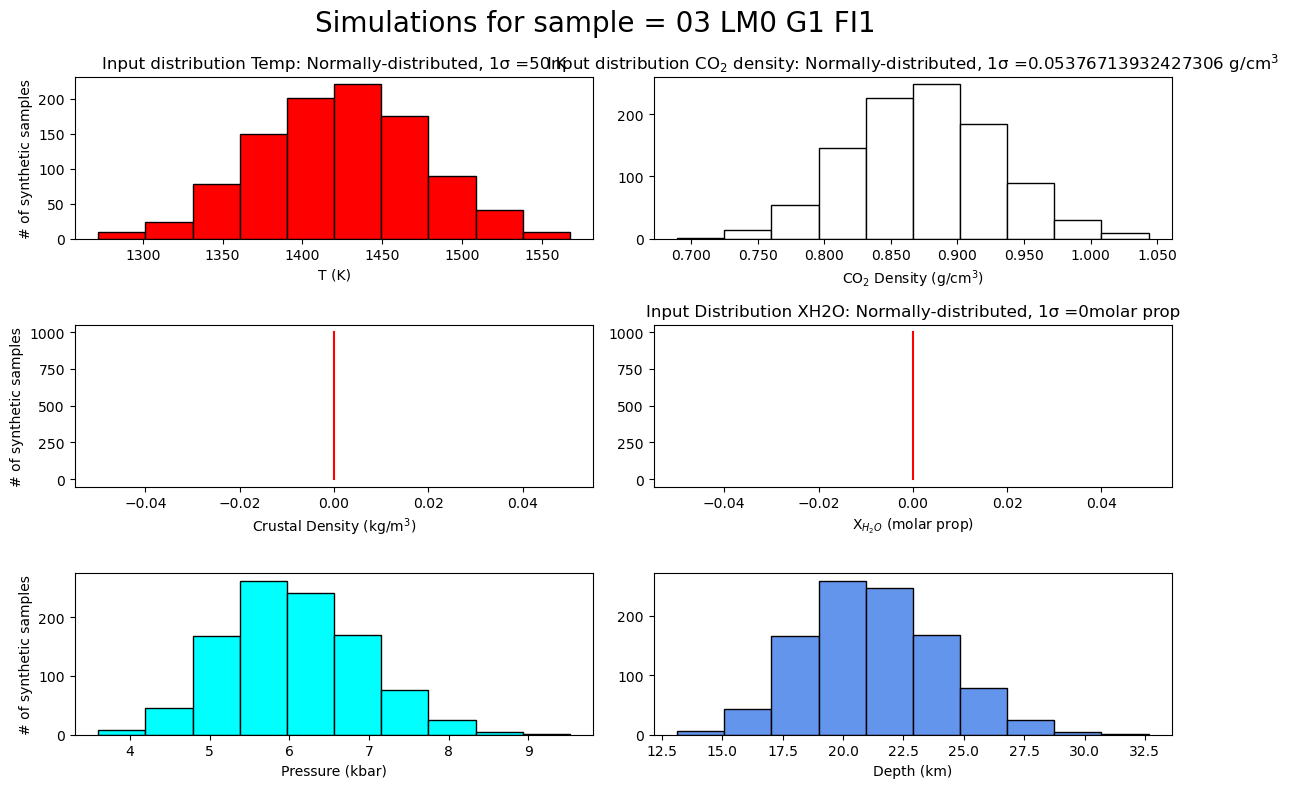